# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success.

In [1]:
# Importing data analysis and visualization libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file
playstore_df = pd.read_csv('googleplaystore.csv')

In [3]:
# Printing fist five rows and all columns in dataFrame.
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore_df.shape

(10841, 13)

In [5]:
# cheking data type's of features present in our dataset.
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# created copy of our dataset
playstore_df_new = playstore_df.copy()

In [7]:
# cheking for how many null values present in our DataFrame
playstore_df_new.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From above we can see in our dataset 'Rating' coulmn has 1474 null values which is maximum as compare to other columns.

<AxesSubplot:xlabel='Rating'>

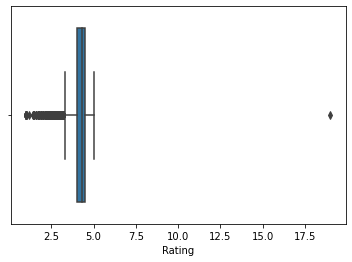

In [8]:
sns.boxplot(x=playstore_df_new['Rating'])

From above boxplot we can see there is outlier present in 'Rating' coulmn

In [9]:
# Finding outlier present in Rating column because Rating should not to be more than 5.0
playstore_df_new[playstore_df_new.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# dropping the outlier 
playstore_df_new.drop([10472], inplace=True)

In [11]:
# Filling all null values present in 'Rating' coulmn with the median.
playstore_df_new['Rating'].fillna(playstore_df_new['Rating'].median(),axis=0,inplace=True)


In [12]:
playstore_df_new['Rating'].isnull().sum()

0

<AxesSubplot:xlabel='Rating'>

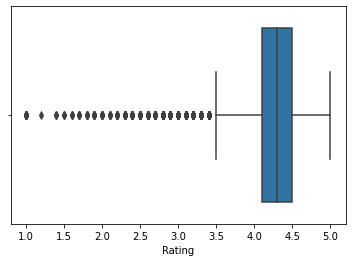

In [13]:
sns.boxplot(x=playstore_df_new['Rating'])

In [14]:
playstore_df_new['Rating'].mean()

4.206476014760287

### Average rating of Apps is 4.2

In [15]:
#Converted 'Reviews' data type from object which included junk to float. 
playstore_df_new['Reviews'] = pd.to_numeric(playstore_df_new['Reviews'],errors='coerce').convert_dtypes()

In [16]:
# Replacing multiple string i.e '+' and ',' present in 'Price' column.
playstore_df_new['Price'] = playstore_df_new['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

In [17]:
# created function to convert all MB and Kb in 'size' coulmn to int
def covert_str_(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1000
  elif value[-1:] == 'M':
    return float(value[:-1])*100000
  else:
    return value[:]

In [18]:
playstore_df_new['Size'] = playstore_df_new['Size'].map(lambda x: covert_str_(x))

In [19]:
playstore_df_new['Size'] = playstore_df_new.Size.replace('Varies with device', np.NaN)

In [20]:
# null values generated in Size coulmn
playstore_df_new['Size'].isnull().sum()

1695

In [21]:
# converted object data type of Size coulmn to  numeric
playstore_df_new['Size'] = pd.to_numeric(playstore_df_new['Size'])

In [22]:
playstore_df_new.dropna(subset=['Size'], inplace=True) # dropped null values of Size coulmn

In [23]:
# removing '+' and ',' prersent in Installs coulmn
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [24]:
# converted Installs coulmn data type from string to integer
playstore_df_new['Installs'] = playstore_df_new['Installs'].astype('int')

In [25]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int32  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), int32(1), object(8)
memory usage: 973.4+ KB


All the coulmns are converted into required Data Types
Dropping unwanted columns in dataFrame

In [26]:

# Dropped 'Last Updated','Current Ver','Android Ver' columns from our data Framne 
playstore_df_new.drop(['Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)

In [27]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int32  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: Int64(1), float64(3), int32(1), object(5)
memory usage: 759.1+ KB


In [28]:
playstore_df_new.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.193384,2.490487e+05,2.165634e+06,7.114842e+06,1.184366
std,0.502702,1.716211e+06,2.247715e+06,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,5.100000e+05,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,1.300000e+06,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+06,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+07,1.000000e+09,400.000000


In [29]:
# No of application present in playstore data w.r.t category.
playstore_df_new['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [30]:
df = pd.DataFrame(playstore_df_new,columns=['Category','Rating'])

In [31]:
df

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10835,BUSINESS,4.3
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,4.3


<AxesSubplot:xlabel='Price'>

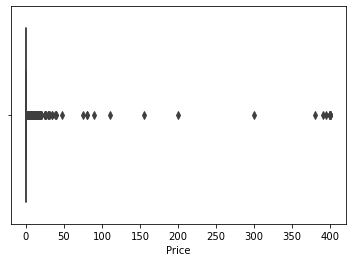

In [32]:
sns.boxplot(x=playstore_df_new['Price'])

In [33]:
playstore_df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.073701,0.065099,0.046391,-0.018861
Reviews,0.073701,1.000000,0.238513,0.627720,-0.009839
Size,0.065099,0.238513,1.000000,0.164698,-0.022337
Installs,0.046391,0.627720,0.164698,1.000000,-0.010481
Price,-0.018861,-0.009839,-0.022337,-0.010481,1.000000


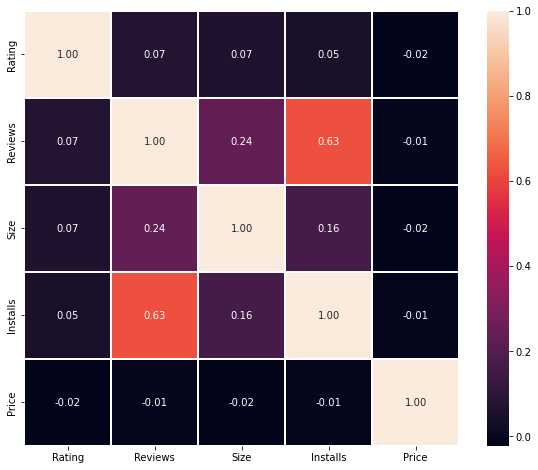

In [34]:
# Heatmap for cheking correlation between columns in Playstore DataFrame. 
fig, axes =plt.subplots(figsize=(10, 8))
sns.heatmap(playstore_df_new.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Number of Reviews is highly correlated with the number of Installs of the application

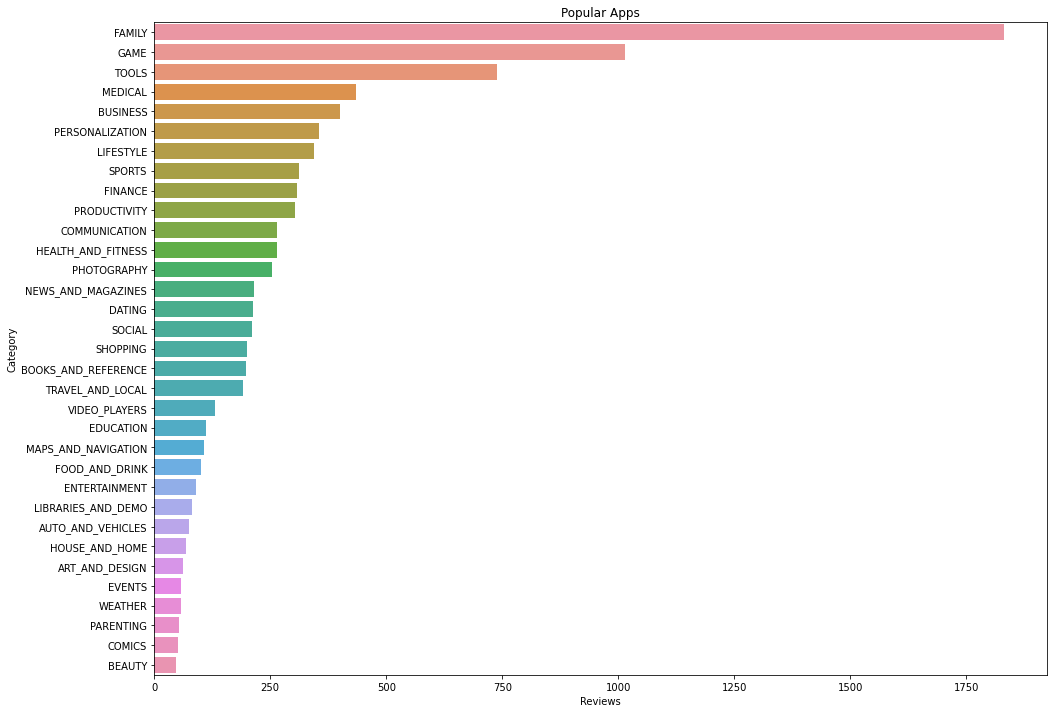

In [35]:
# Plotting Barplot for visualize apps reviews w.r.t Category.
apps_category = playstore_df_new.Category.value_counts();
plt.figure(figsize=(16, 12));
sns.barplot(apps_category, apps_category.index);
plt.ylabel('Category');
plt.xlabel('Reviews');
plt.title('Popular Apps');
plt.show();

### So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category getting most number of reviews and very least reviews least for Beauty & Comics Category.

Which category of Apps from the Content Rating column are found more on playstore

In [36]:
Category = playstore_df_new['Content Rating'].value_counts().index
Values = playstore_df_new['Content Rating'].value_counts()

Category_list = []
Values_list = []
for i in range(len(Category)):
    Category_list.append(Category[i])
    Values_list.append(Values[i])

In [37]:
print(Category_list)

['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated']


In [38]:
print(Values_list)

[7416, 987, 406, 332, 2, 2]


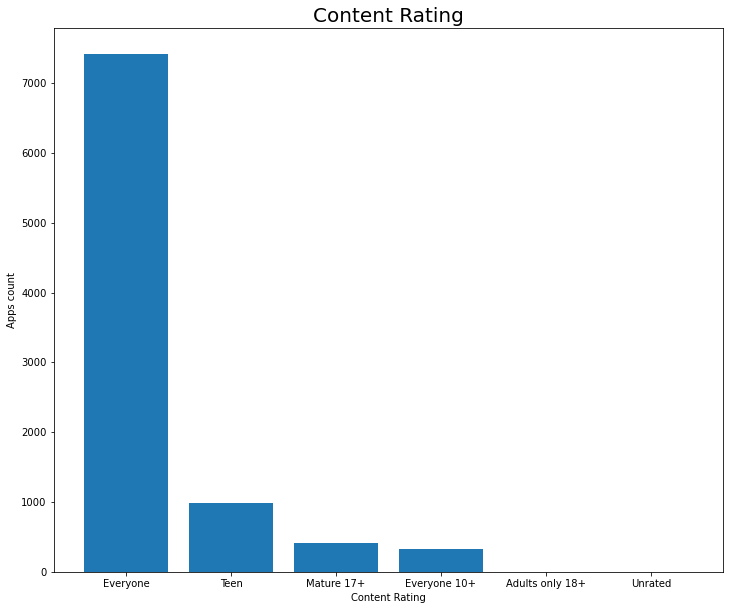

In [39]:
# Plotting the bar graph to visualize Content Rating.
plt.figure(figsize=(12,10))
plt.bar(Category_list,Values_list,width=0.8, alpha= 1);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps count');
plt.xlabel('Content Rating');

### From the above plot we can see that Everyone category having majority of apps count.

In [40]:
# Creating Dataframe for category wise app installs.
highest_installs_df =playstore_df_new.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [41]:
highest_installs_df.head()

,Installs
Category,
GAME,2.987456e+10
FAMILY,6.798793e+09
COMMUNICATION,4.941943e+09
NEWS_AND_MAGAZINES,4.252006e+09
TOOLS,3.527095e+09


In [42]:
number_of_installs = []
app_category = []

for i in range(len(highest_installs_df)):
    number_of_installs.append(highest_installs_df.Installs[i])
    app_category.append(highest_installs_df.index[i])

In [43]:
print(number_of_installs)

[29874564253.0, 6798793425.0, 4941943051.0, 4252005650.0, 3527094815.0, 2742312744.0, 2557897655.0, 1504248785.0, 1138949498.0, 998179772.0, 950960000.0, 925264802.0, 891867720.0, 868411912.0, 536078560.0, 437820839.0, 356666146.0, 316923484.0, 278802000.0, 177688740.0, 175029890.0, 141880807.0, 139962076.0, 139300020.0, 99338100.0, 75112461.0, 61895910.0, 46543877.0, 43770211.0, 23971010.0, 17586150.0, 13696950.0, 10672151.0]


In [44]:
app_category

['GAME',
 'FAMILY',
 'COMMUNICATION',
 'NEWS_AND_MAGAZINES',
 'TOOLS',
 'PRODUCTIVITY',
 'PHOTOGRAPHY',
 'SHOPPING',
 'SPORTS',
 'PERSONALIZATION',
 'ENTERTAINMENT',
 'SOCIAL',
 'VIDEO_PLAYERS',
 'HEALTH_AND_FITNESS',
 'BUSINESS',
 'LIFESTYLE',
 'TRAVEL_AND_LOCAL',
 'FINANCE',
 'EDUCATION',
 'FOOD_AND_DRINK',
 'MAPS_AND_NAVIGATION',
 'DATING',
 'BOOKS_AND_REFERENCE',
 'WEATHER',
 'ART_AND_DESIGN',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'MEDICAL',
 'AUTO_AND_VEHICLES',
 'PARENTING',
 'COMICS',
 'BEAUTY',
 'EVENTS']

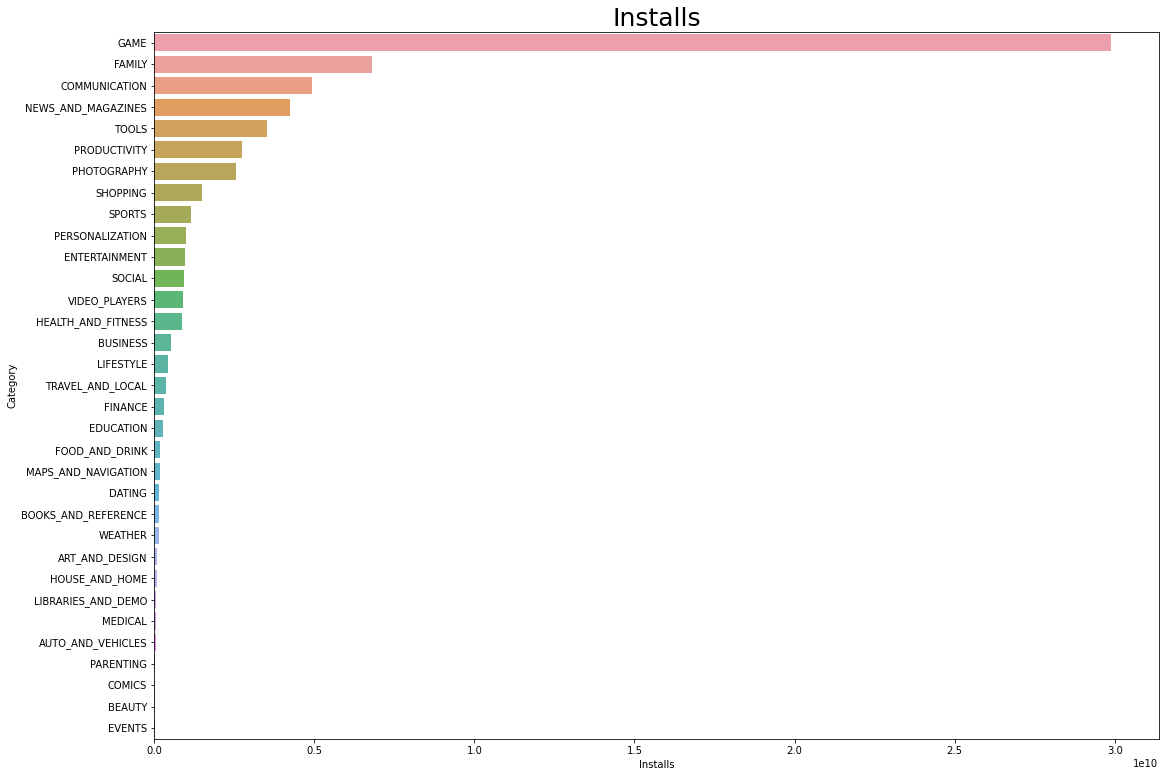

In [45]:
# Plotting barplots for visualize apps category w.r.t. number of installs.
plt.figure(figsize=(18,13))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = number_of_installs, y = app_category, alpha =0.9)
graph.set_title("Installs", fontsize = 25);

### From above plot we can see 'GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS' are the most installed category on Playstore.
### Let's Visualize top category wise Apps and see which apps is installed most on the playstore

Top installed apps

In [46]:
pd.set_option('display.max_rows',None)
top_apps= playstore_df_new.groupby('App')['Installs'].sum().sort_values(ascending=False)

In [47]:
top_apps.head(10)

App
Subway Surfers                                 6.000000e+09
Google News                                    4.000000e+09
Candy Crush Saga                               3.500000e+09
Temple Run 2                                   3.000000e+09
Pou                                            2.000000e+09
imo free video calls and chat                  2.000000e+09
UC Browser - Fast Download Private & Secure    1.500000e+09
Dropbox                                        1.500000e+09
SHAREit - Transfer & Share                     1.000000e+09
ROBLOX                                         9.000000e+08
Name: Installs, dtype: float64

Top installed apps by category

In [48]:
# created function for getting top apps w.r.t category
def top_apps_in_category(str):
    top = playstore_df_new[playstore_df_new['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(12,8))
    plt.title('Top Installed Apps',size = 20)    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

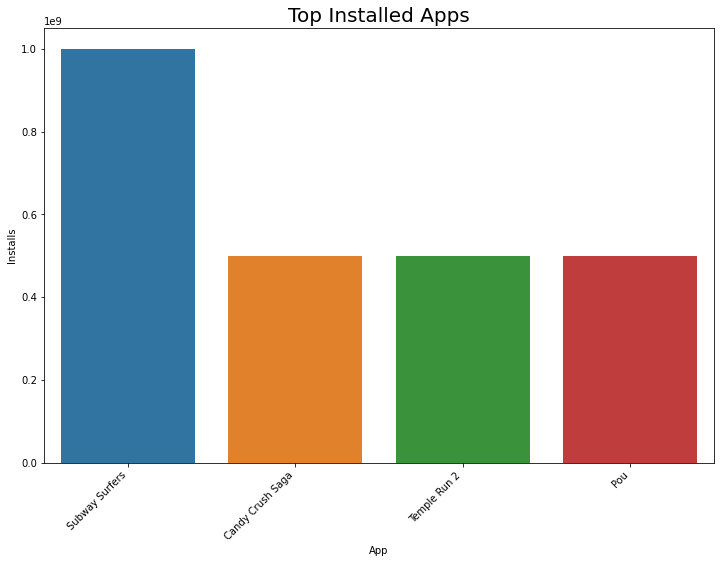

In [49]:
# Top apps for game Category
top_apps_in_category('GAME')

### 'Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', and 'Pou' are the top install apps of GAME Category on Playstore.

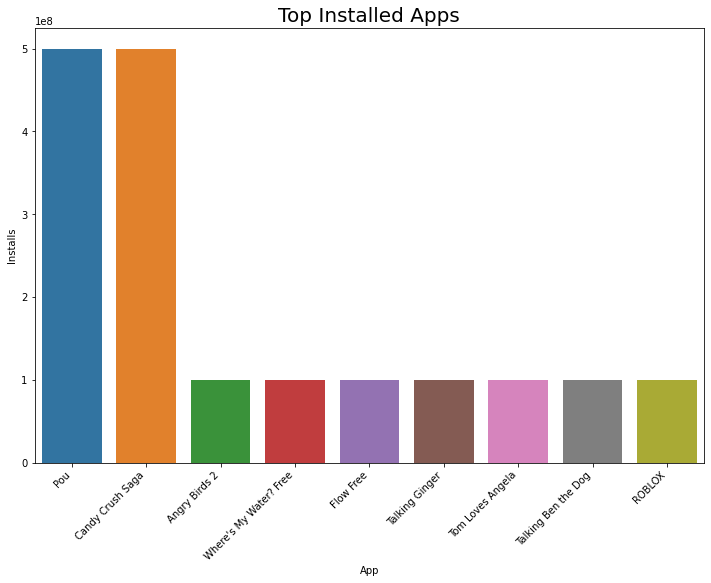

In [50]:
# Top apps for Family Category
top_apps_in_category('FAMILY')

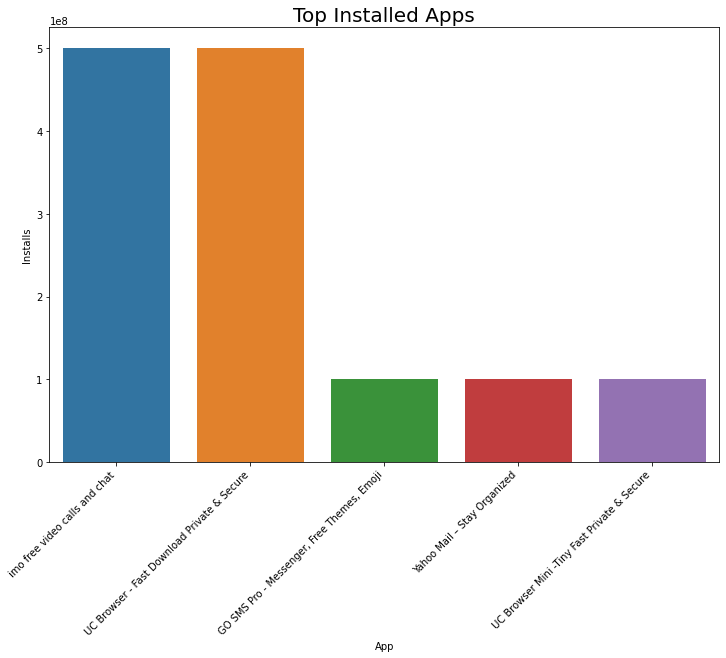

In [51]:
# Top apps for COMMUNICATION Category
top_apps_in_category('COMMUNICATION')

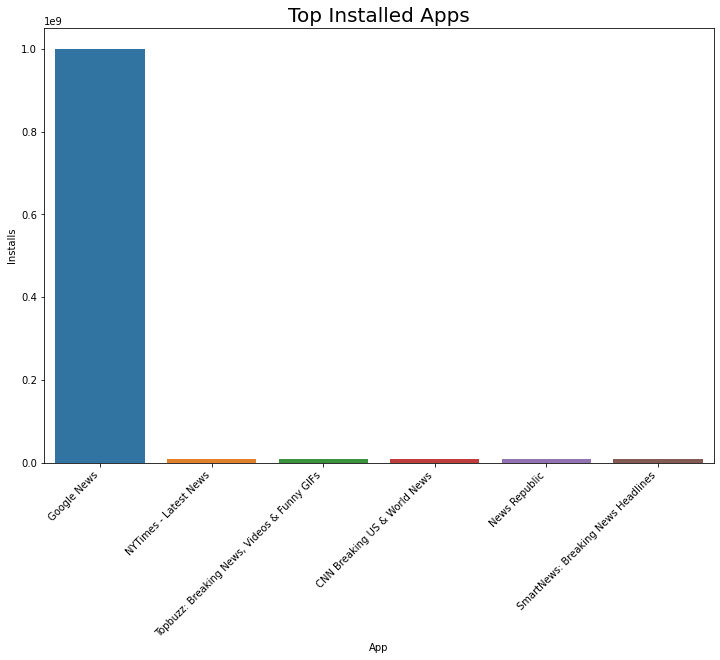

In [52]:
# Top apps for NEWS_AND_MAGAZINES Category
top_apps_in_category('NEWS_AND_MAGAZINES')

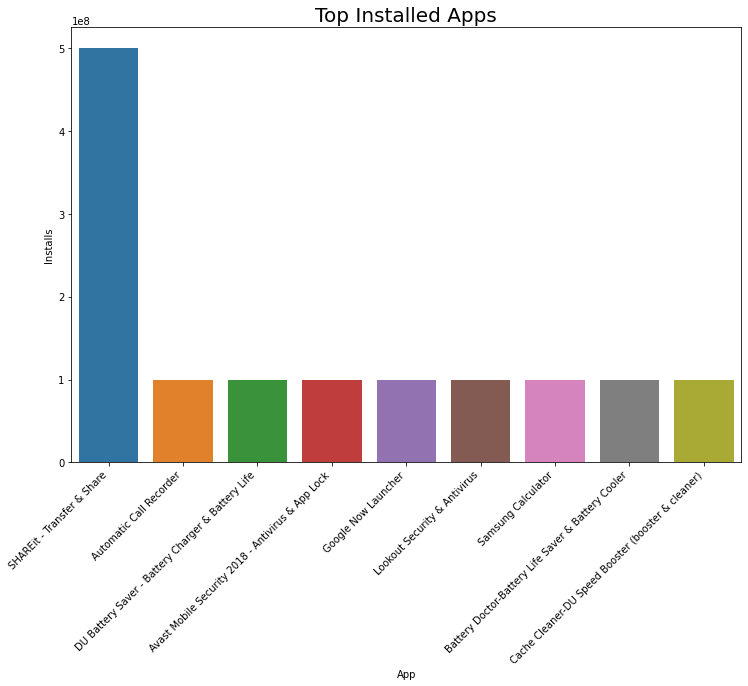

In [53]:
# Top apps for TOOLS Category
top_apps_in_category('TOOLS')

### Make a jointplot to understand the effect of size on rating

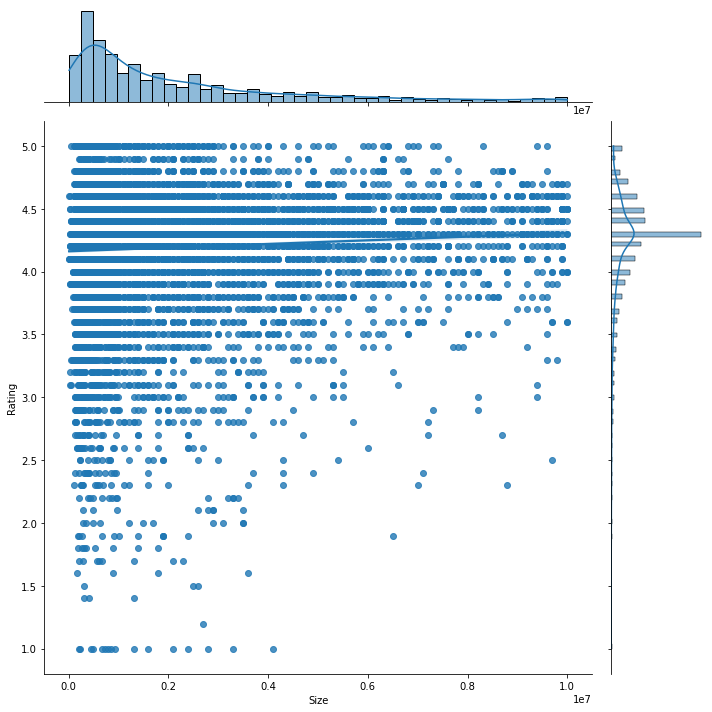

In [54]:
# Make a jointplot to understand the effect of size on rating
sns.jointplot(x = 'Size', y= 'Rating', data = playstore_df_new, kind='reg', height=10);

### From above jointplot we can see the app size increases less number of rating.
### We can say that as app size increase less number of users will use it.
### Most user gives rating more than 3 - 3.5 to larger size of apps it might be due to its great features.

Effect of price on rating

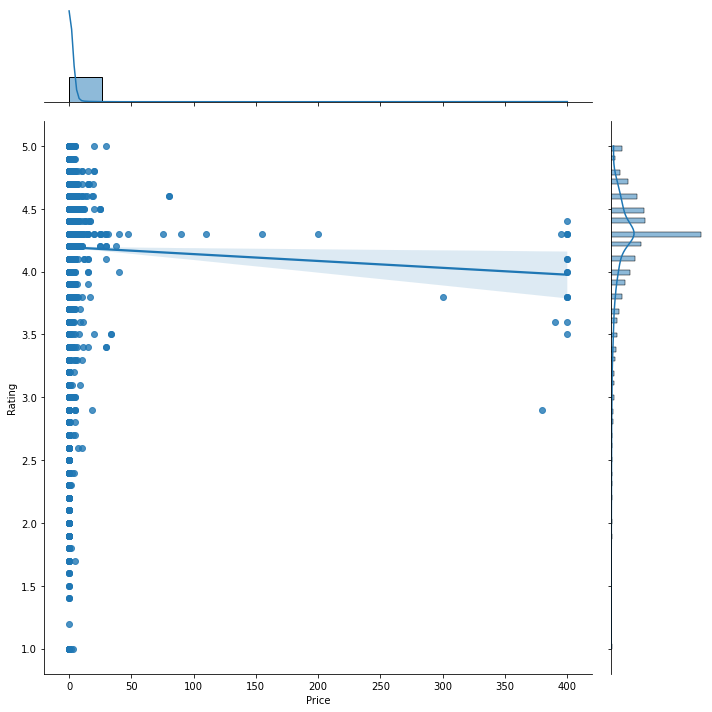

In [55]:
# Making a jointplot to understand the effect of price on rating
sns.jointplot(x='Price', y='Rating', data=playstore_df_new, kind='reg', height=10);

### App with price cost 0 dollar having large number of users rating
### As the Price of apps increased greater than 10 dollar number of rating decreases
### Plot a visualization graph to view what portion of the apps in the play store are paid and free.

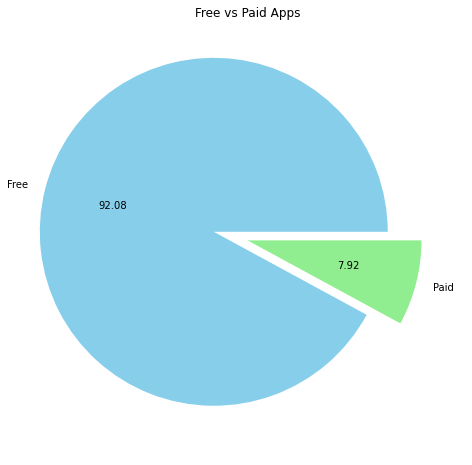

In [56]:
# percentage of free vs paid apps aviilable on playstore
plt.subplots(figsize=(12,8))
Free_vs_paid = playstore_df_new.groupby('Type').size()
colors = ["skyblue","lightgreen"]
explode = (0.2,0)
plt.pie(Free_vs_paid, explode=explode, colors=colors,labels=['Free','Paid'],autopct='%.2f')
plt.title('Free vs Paid Apps')
plt.show()

### From the above graph we can see that 92% of apps in google play store are free and 8%(Approx.) are paid.

In [57]:
# What is the count of applications in each category differentiated by their type?
app_count = playstore_df_new.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
print(app_count)

               Category  Type  Count
0        ART_AND_DESIGN  Free     59
1        ART_AND_DESIGN  Paid      3
2     AUTO_AND_VEHICLES  Free     73
3     AUTO_AND_VEHICLES  Paid      2
4                BEAUTY  Free     47
5   BOOKS_AND_REFERENCE  Free    170
6   BOOKS_AND_REFERENCE  Paid     27
7              BUSINESS  Free    387
8              BUSINESS  Paid     13
9                COMICS  Free     51
10        COMMUNICATION  Free    242
11        COMMUNICATION  Paid     23
12               DATING  Free    207
13               DATING  Paid      5
14            EDUCATION  Free    107
15            EDUCATION  Paid      4
16        ENTERTAINMENT  Free     89
17        ENTERTAINMENT  Paid      1
18               EVENTS  Free     56
19               EVENTS  Paid      1
20               FAMILY  Free   1654
21               FAMILY  Paid    178
22              FINANCE  Free    290
23              FINANCE  Paid     17
24       FOOD_AND_DRINK  Free     99
25       FOOD_AND_DRINK  Paid      1
2

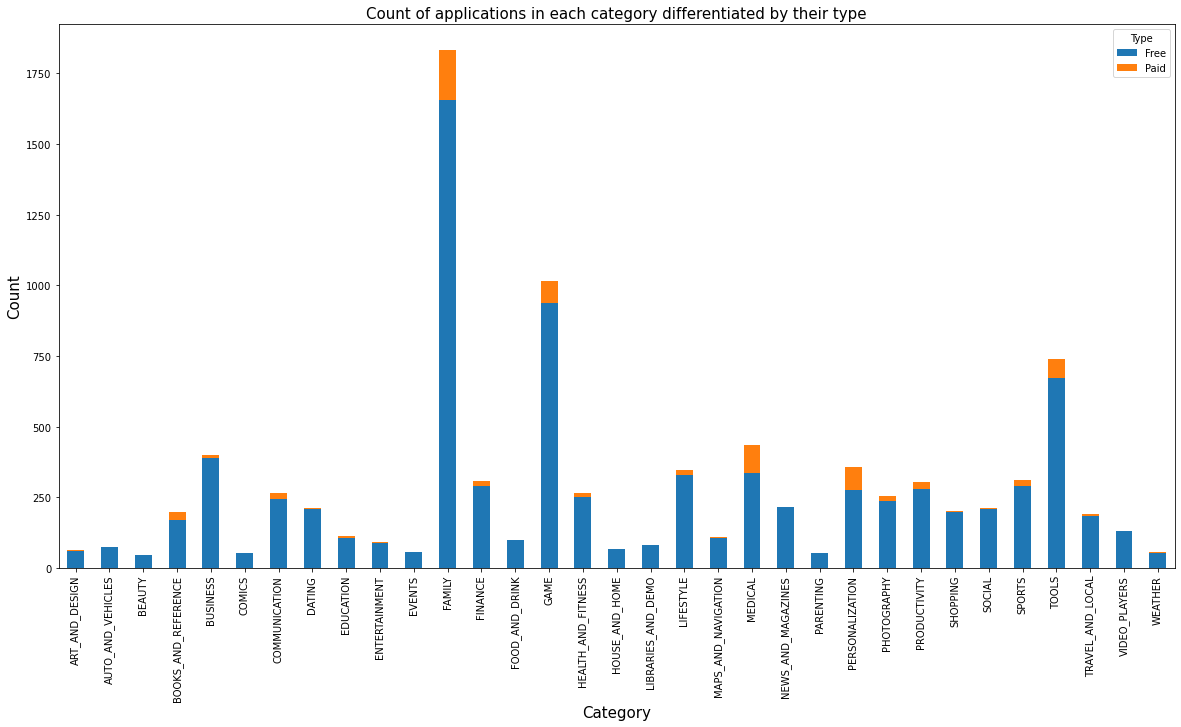

In [58]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').reset_index()
df_app_count.set_index('Category').plot(kind='bar',stacked=True, figsize=(20,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type",size = 15)
plt.show()

### It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games and Tools, as well as Social categories were free to install.

# Conclusion -
###  1.Average rating of Apps is 4.2
###  2.Apps are under Family & Game category getting most number of reviews and very least reviews for Beauty & Comics Category App
###  3.Everyone category having majority of apps count.
###  4. 'GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS' are the most installed category
###  5.'Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', and 'Pou' are the top install apps of GAME Category
### 6. 92% of apps in google play store are free and 8%(Approx.) are paid.